### **Linear Regression Algorithm**


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Creating datapoints

In [ ]:
x = [1,2,2.5,3,4,5]
y = [1,4,7,9,15,19]

Calling the plot function and creating line of best fit

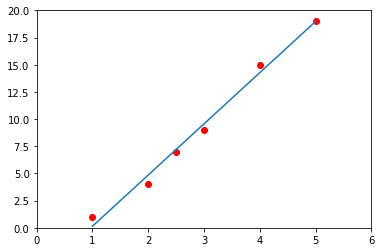

In [ ]:
plt.plot(x,y,'ro')
plt.axis([0,6,0,20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.show()

## **Setup**

In [1]:
!pip install -q sklearn

In [ ]:
%tensorflow_version 2.x

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

Load the dataset

In [7]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')#training dataset
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') #test dataset

I am storing the survived column to a new variable for each dataset using the .pop() method

 

In [13]:
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
print(dftrain.loc[0], y_train.loc[0]) # prints the data located at the 0 index of each dataset

sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 0


the .head() function prints the first five elements of the indicated dataset

In [14]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


.describe() function runs statistical analysis of the dataset

In [17]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


.shape returns the number of rows by columns

In [19]:
dftrain.shape

(627, 9)

### Correlation review

Returning a histogram of the ages

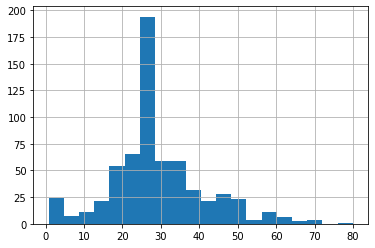

In [23]:
dftrain.age.hist(bins = 20)

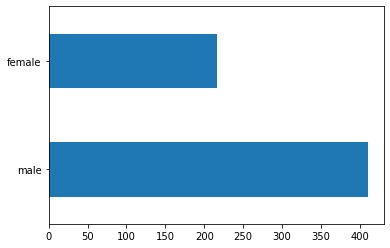

In [30]:
dftrain.sex.value_counts().plot(kind = 'barh')

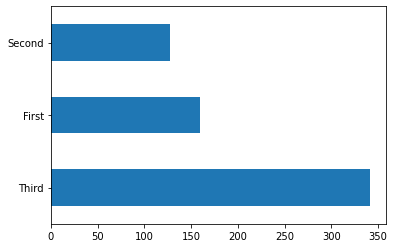

In [31]:
dftrain['class'].value_counts().plot(kind = 'barh')

Text(0.5, 0, 'Survival percentage')

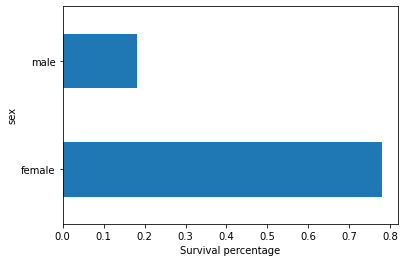

In [37]:
pd.concat([dftrain,y_train], axis=1).groupby('sex').survived.mean().plot(kind = 'barh').set_xlabel('Survival percentage')